# Analysis for San Francisco Bay Ford GoBike Service 2019

## Oni Oluwasegun Yemi


## Investigation Overview

In this report, I want to explore the features that influences bike duration. Also, to explore the interactions that exists within other variables in the dataset. 


## Dataset Overview

The dataset contians 183412 bikers attributes for the Ford GoBike dataset. The major attributes of the dataset are trip duration, ride start and end time, station route, member's age, gender and bike user type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
plt.style.use('seaborn-whitegrid')
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
## Change the data type for start_time and end_time from object to datetime 
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [4]:
## Filling up missing values 
bike['start_station_id'].fillna(0, inplace=True)
bike['end_station_id'].fillna(0, inplace=True)
bike['member_birth_year'].fillna(0, inplace=True)

In [5]:
## Change the data type of start_station_id and end_station_id and member_birth_year from float to int
bike['start_station_id'] = bike['start_station_id'].astype('int64')
bike['end_station_id'] = bike['end_station_id'].astype('int64')
bike['member_birth_year'] = bike['member_birth_year'].astype('int64')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Ride duration 

The histogram plot of the ride distribution per seconds is rightly skewed with a long tail. The average duration per sec as shown on the histogram is 726.08. Plotted on a logarithm scale, the distribution becomes normally distributed.

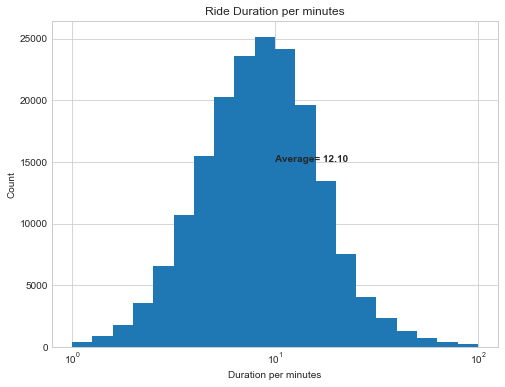

In [6]:
## Ride duration per minutes factored by gender 
bike['duration_minutes'] = round(bike['duration_sec']/60,2)
mean=bike['duration_minutes'].mean()
binsize = 10**np.arange(0, 2+0.1, 0.1)
plt.figure(figsize =[8,6])
plt.hist(data= bike, x= 'duration_minutes', bins=binsize)
plt.title('Ride Duration per minutes')
plt.annotate('Average= %.2f'%(mean), xy = (10,15000), 
             fontsize = 10, fontweight='bold')
plt.xlabel('Duration per minutes')
plt.ylabel('Count')
plt.xscale("log");

##  Distribution of Age  

The five point summary statistics values are clearly observed on the plot. The minimum age value is lesser than 20, the first quartile is less than 30, the median age is above 30 but lesser than 35. The Q3 is between 35-40 and the maximum age value is close to 55 years. There is an indication of three outliers. 

In [7]:
def age(col):
    if col==0:
        return 0
    else:
        return 2019-col

In [8]:
bike['member_age']= bike['member_birth_year'].apply(age)

In [9]:
bike_copy = bike.query('member_age!=0')
Q1 = np.percentile(bike_copy['member_age'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(bike_copy['member_age'], 75,
                   interpolation = 'midpoint')
IQR = Q3-Q1
new_data = bike_copy[~(bike_copy['member_age'] >= (Q3+1.5*IQR)) |(bike_copy['member_age'] <= (Q3+1.5*IQR))]

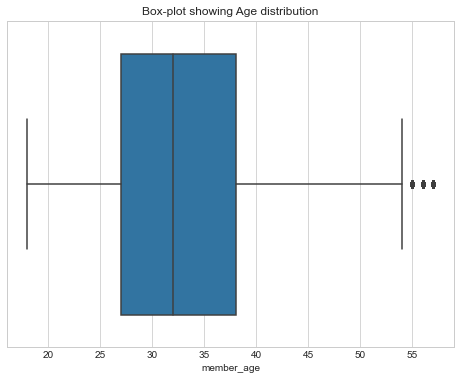

In [10]:
plt.figure(figsize=[8,6])
sb.boxplot(x=new_data['member_age'])
plt.title('Box-plot showing Age distribution');

## Distribution of Gender 

The pie chart shows the distribution of bike riders gender. Majority (74.6%) are Male, 23.3% are female and about 2.1% belongs to other gender catrgory

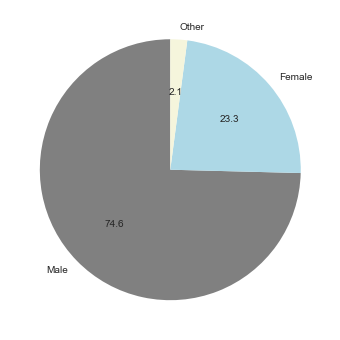

In [11]:
gender_count=pd.Series(bike['member_gender'].value_counts())

plt.figure(figsize=[8,6])
color = ['grey',"lightblue",'beige']
explode = [0,0,0.5]
plt.pie(x=gender_count,labels = gender_count.index,startangle=90, colors=color,autopct='%.1f');

In [12]:
def age(col):
    if col==0:
        return 0
    else:
        return 2019-col

In [13]:
bike['member_age']= bike['member_birth_year'].apply(age)
bike_copy = bike.query('member_age!=0')

# Age Vs. Trip Duration 
The satterplot shows the relationship between the riders age and the duration of ride per seconds. A positive relationship can be observed between the duration and members age. This implies that increase in age could possibly results into increase in trip duration.

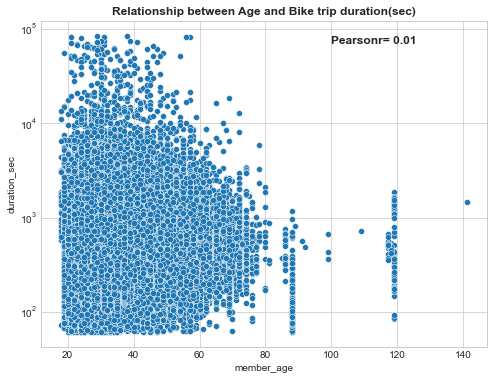

In [14]:
corr = np.corrcoef(bike_copy['member_age'],bike_copy['duration_sec'])[0,1] ## calculating the correlation coefficient 
plt.figure(figsize=[8,6])
sb.scatterplot(x="member_age",y="duration_sec",data=bike_copy)
plt.annotate('Pearsonr= %.2f'%(corr), xy = (100,70000), 
              fontsize = 12, fontweight='bold')
plt.title('Relationship between Age and Bike trip duration(sec)', fontweight='bold')
plt.yscale('log');

# User type Vs. Duration
Exploring trip duration based on user type, registered users tends to have higher ride duration than than casual or subscriber users.

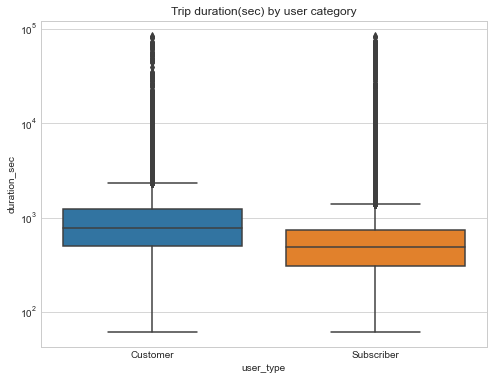

In [15]:
plt.figure(figsize=[8,6])
plt.title('Trip duration(sec) by user category')
sb.boxplot(x='user_type', y='duration_sec', data=bike_copy)
plt.yscale('log')

# Ride Frequency 
5PM and 8AM are observed to be the most popular hours for using the Ford GoBike. Also, Mid-weeks tends to have higher frequency ride compared to weekends which are litte or less popular during the peak ride hours. 

In [16]:
##Extarcting time from  the start_time variable  
time= bike_copy['start_time'].dt.time

## Converting the tim into a 12 hours time format
#bike_copy['12hrs_time']= time.apply(lambda x: x.strftime("%I:%M %p"))

##Extracting only the minutes in AM/PM from the time 
bike_copy['Start_time_period'] = time.apply(lambda x: x.strftime("%I %p"))

# to remove the unwanted space
bike_copy['Start_time_period']=bike_copy['Start_time_period'].apply(lambda x:x.replace(" ",""))

In [17]:
bike_copy['days'] = bike_copy['start_time'].dt.day_name()
bike_copy['hour'] = bike_copy['start_time'].dt.hour

In [18]:
## Creating a cross tab to obtain the ride frequency
crosstab_freq = pd.crosstab(bike_copy['Start_time_period'], bike_copy['days'])
crosstab_freq= crosstab_freq.reindex(columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

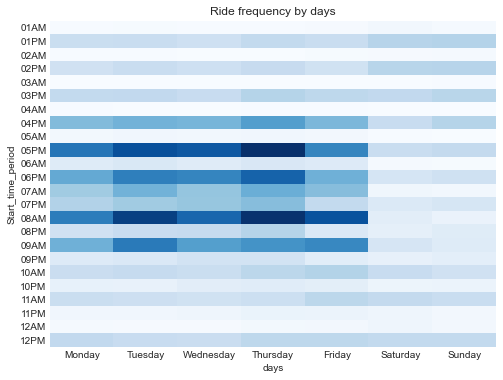

In [19]:
plt.figure(figsize =(8,6))
sb.heatmap(crosstab_freq,cmap="Blues", cbar = False)
plt.title('Ride frequency by days');

# Top Route based on Average trip per minutes 
The most popular route based on average ride per minutes is between 11th St at Natoma St and 16th St Depot. follwed by Route between Scott St at Golden Gate Ave and McAllister St, and Powell St BART staion and 16th St Depot. 

In [20]:
bike_copy['duration_minutes'] = round(bike_copy['duration_sec']/60,2)
bike_copy['combined_route'] = bike_copy['start_station_name'] + '-' + bike_copy['end_station_name']
byroute = bike_copy[['duration_minutes','combined_route']].groupby('combined_route') 
byroute= byroute.mean().sort_values(by = 'duration_minutes', ascending= False).reset_index()
byroute['start_route'], byroute['end_route'] =byroute['combined_route'].str.split('-',1).str
byroute = byroute[:10]

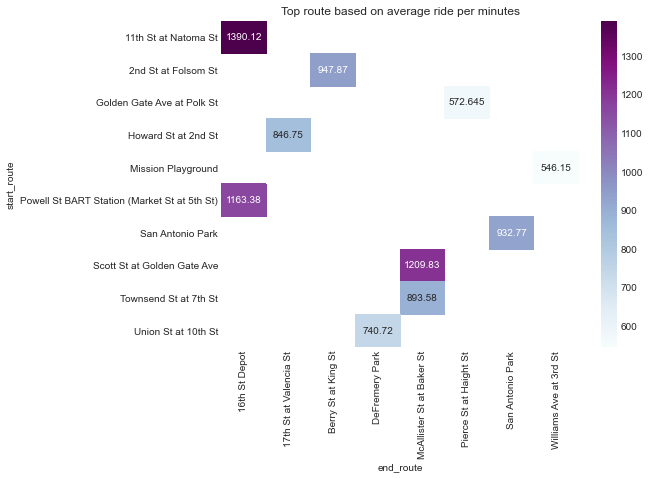

In [21]:
pivot_route = byroute.pivot_table(index = 'start_route', columns = 'end_route', values = 'duration_minutes')
plt.figure(figsize=[8,6])
sb.heatmap(pivot_route, annot = True, fmt='g', cmap = 'BuPu')
plt.title('Top route based on average ride per minutes');

In [ ]:
!jupyter nbconvert Communicate_data_findings_slide_deck.ipynb --to slides --post serve --no-input --no-prompt